# Diabetes Prediction Project

## Python Implementation

Based on the Pima Indians historical diabetes data, build a machine learning binary classification model to predict if the person is diabetic or Not based on below features.
 
- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

**Label**

- Outcome

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')   # Reading the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Observations

Pregnancies - 

- Categrical Data
- max value cannot be 17 or maybe its because of one or two person so act like a outliers

Glucose, BloodPressure, SkinThickness, Insulin, BMI

- compared to mean, std is high and in insulin std is more than mean which is not possible
- min value can't be 0
- max level can't be this high and also difference b/w 75% and max is more means outliers is there

DiabetesPedigreeFunction, Age - 

- compared to mean, std is high
- max level can't be this high and also difference b/w 75% and max is more means outliers is there

It seems that there are no missing values in our data. Great, let's see the distribution of data:

### Data Preprocessing(Analysis(EDA))

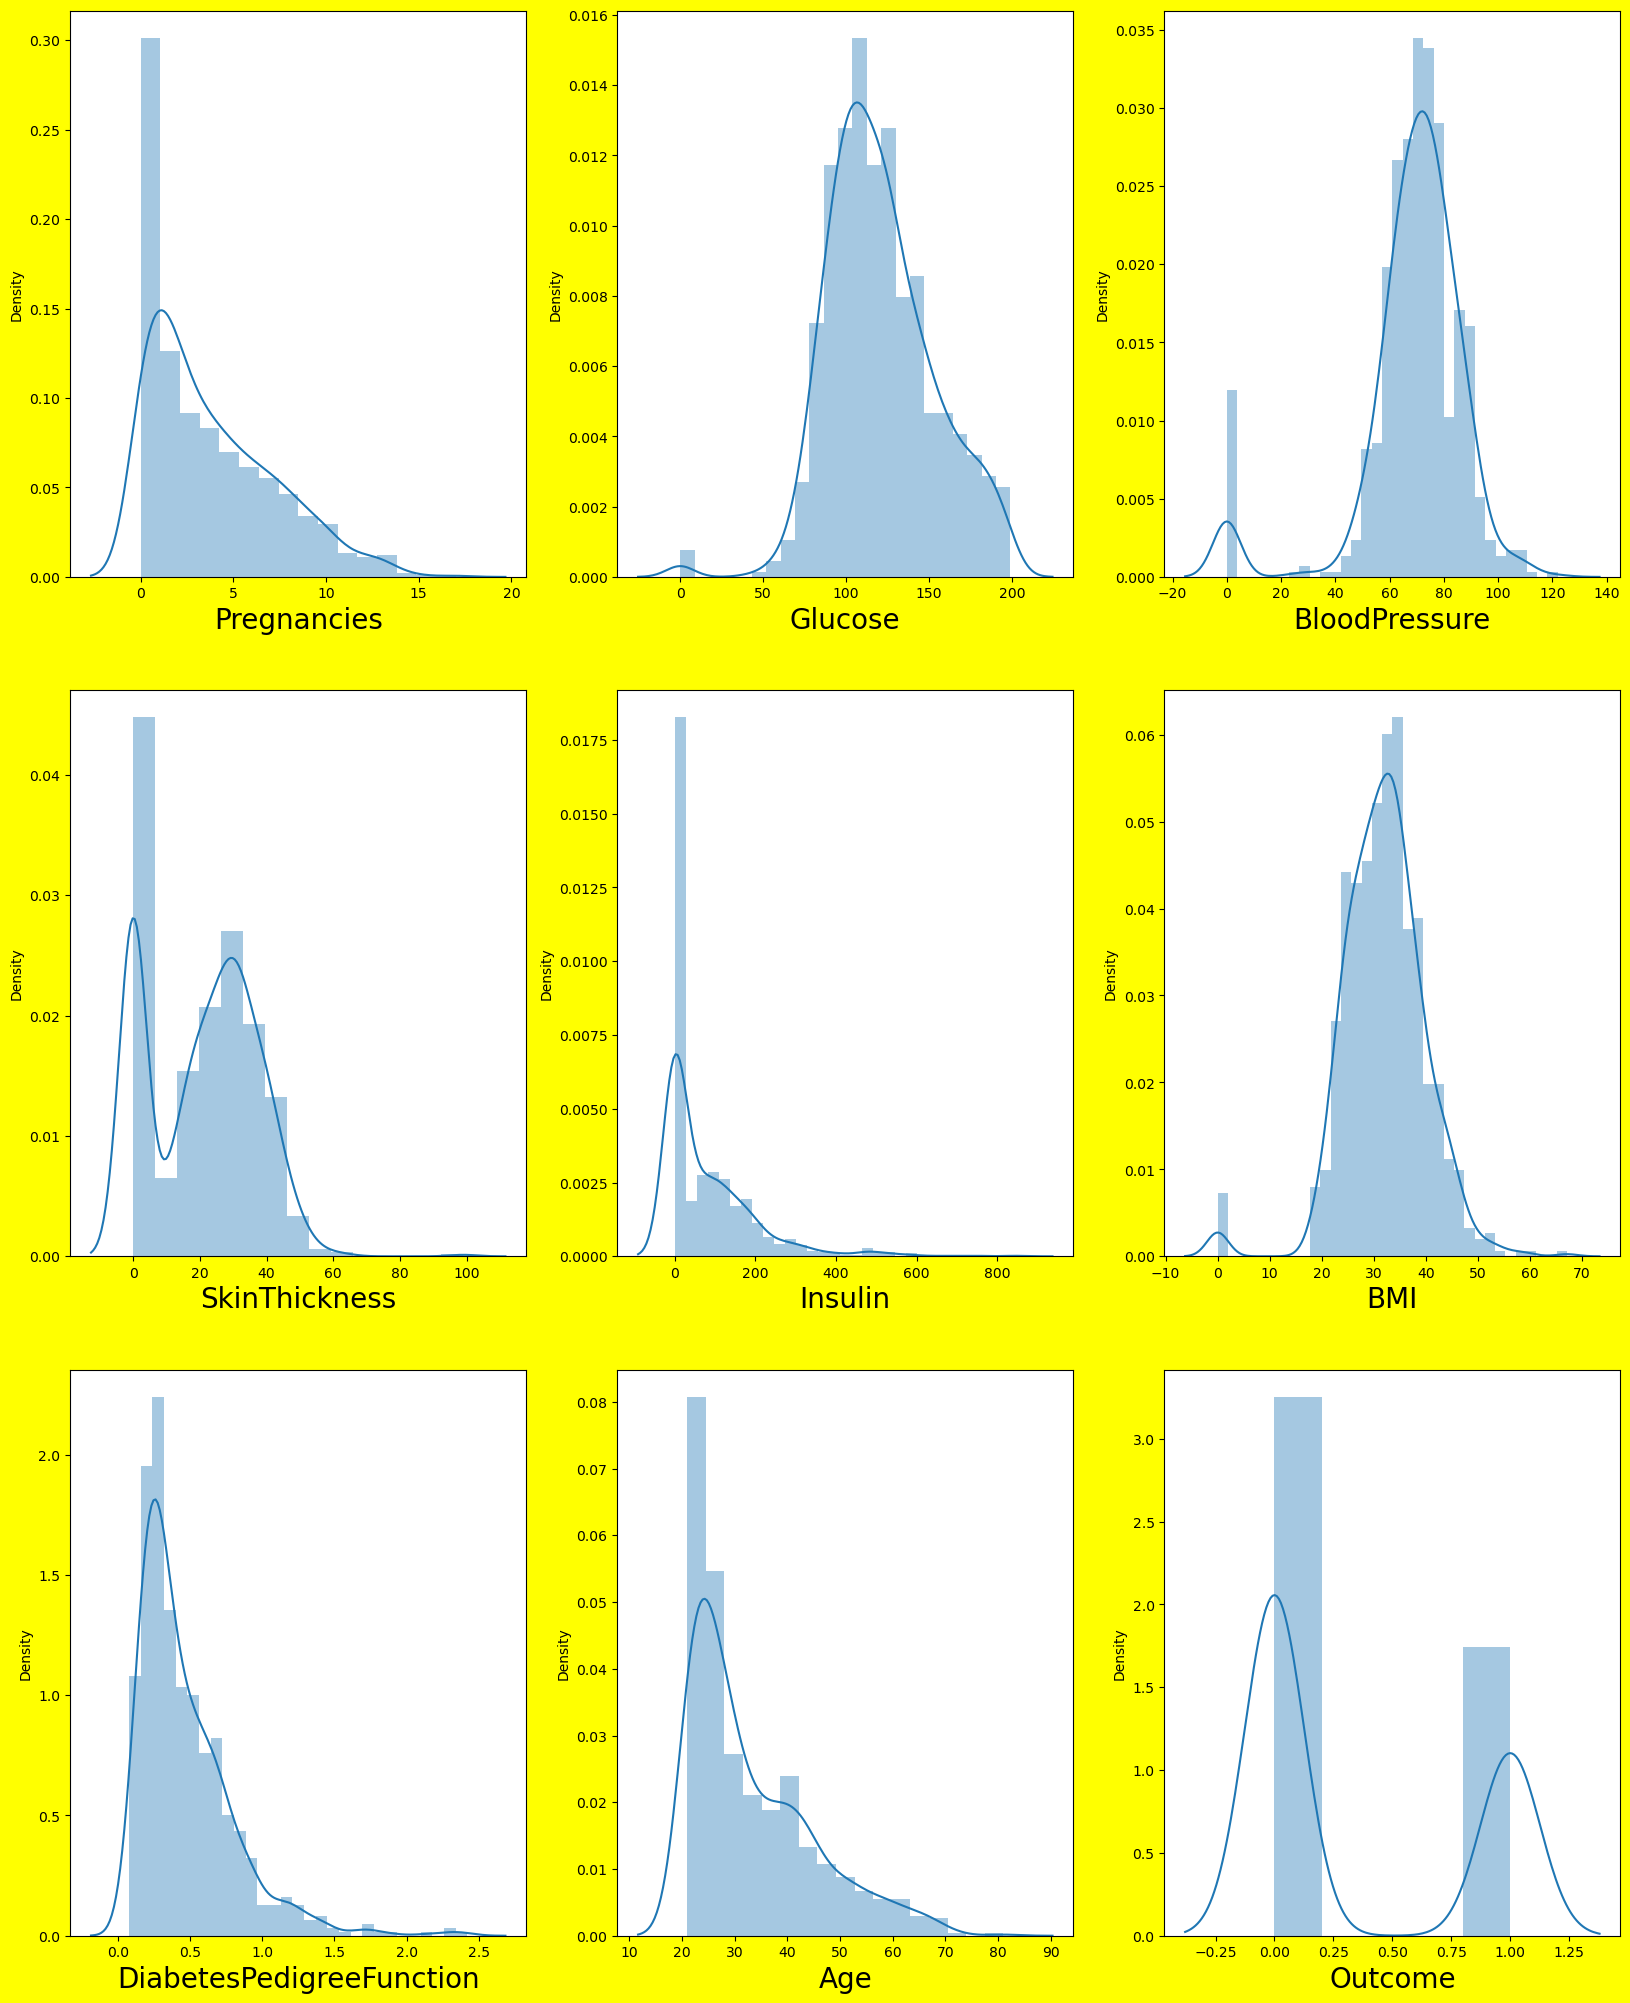

In [5]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber +=1
plt.show()

In [6]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

We can see there is some skewness in the data, let's deal with data.

Also, we can see there are few data for columns Glucose,Blood Pressure, Skin Thickness, Insulin and BMI which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [7]:
# replacing zero values with the mean of the column

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())

data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

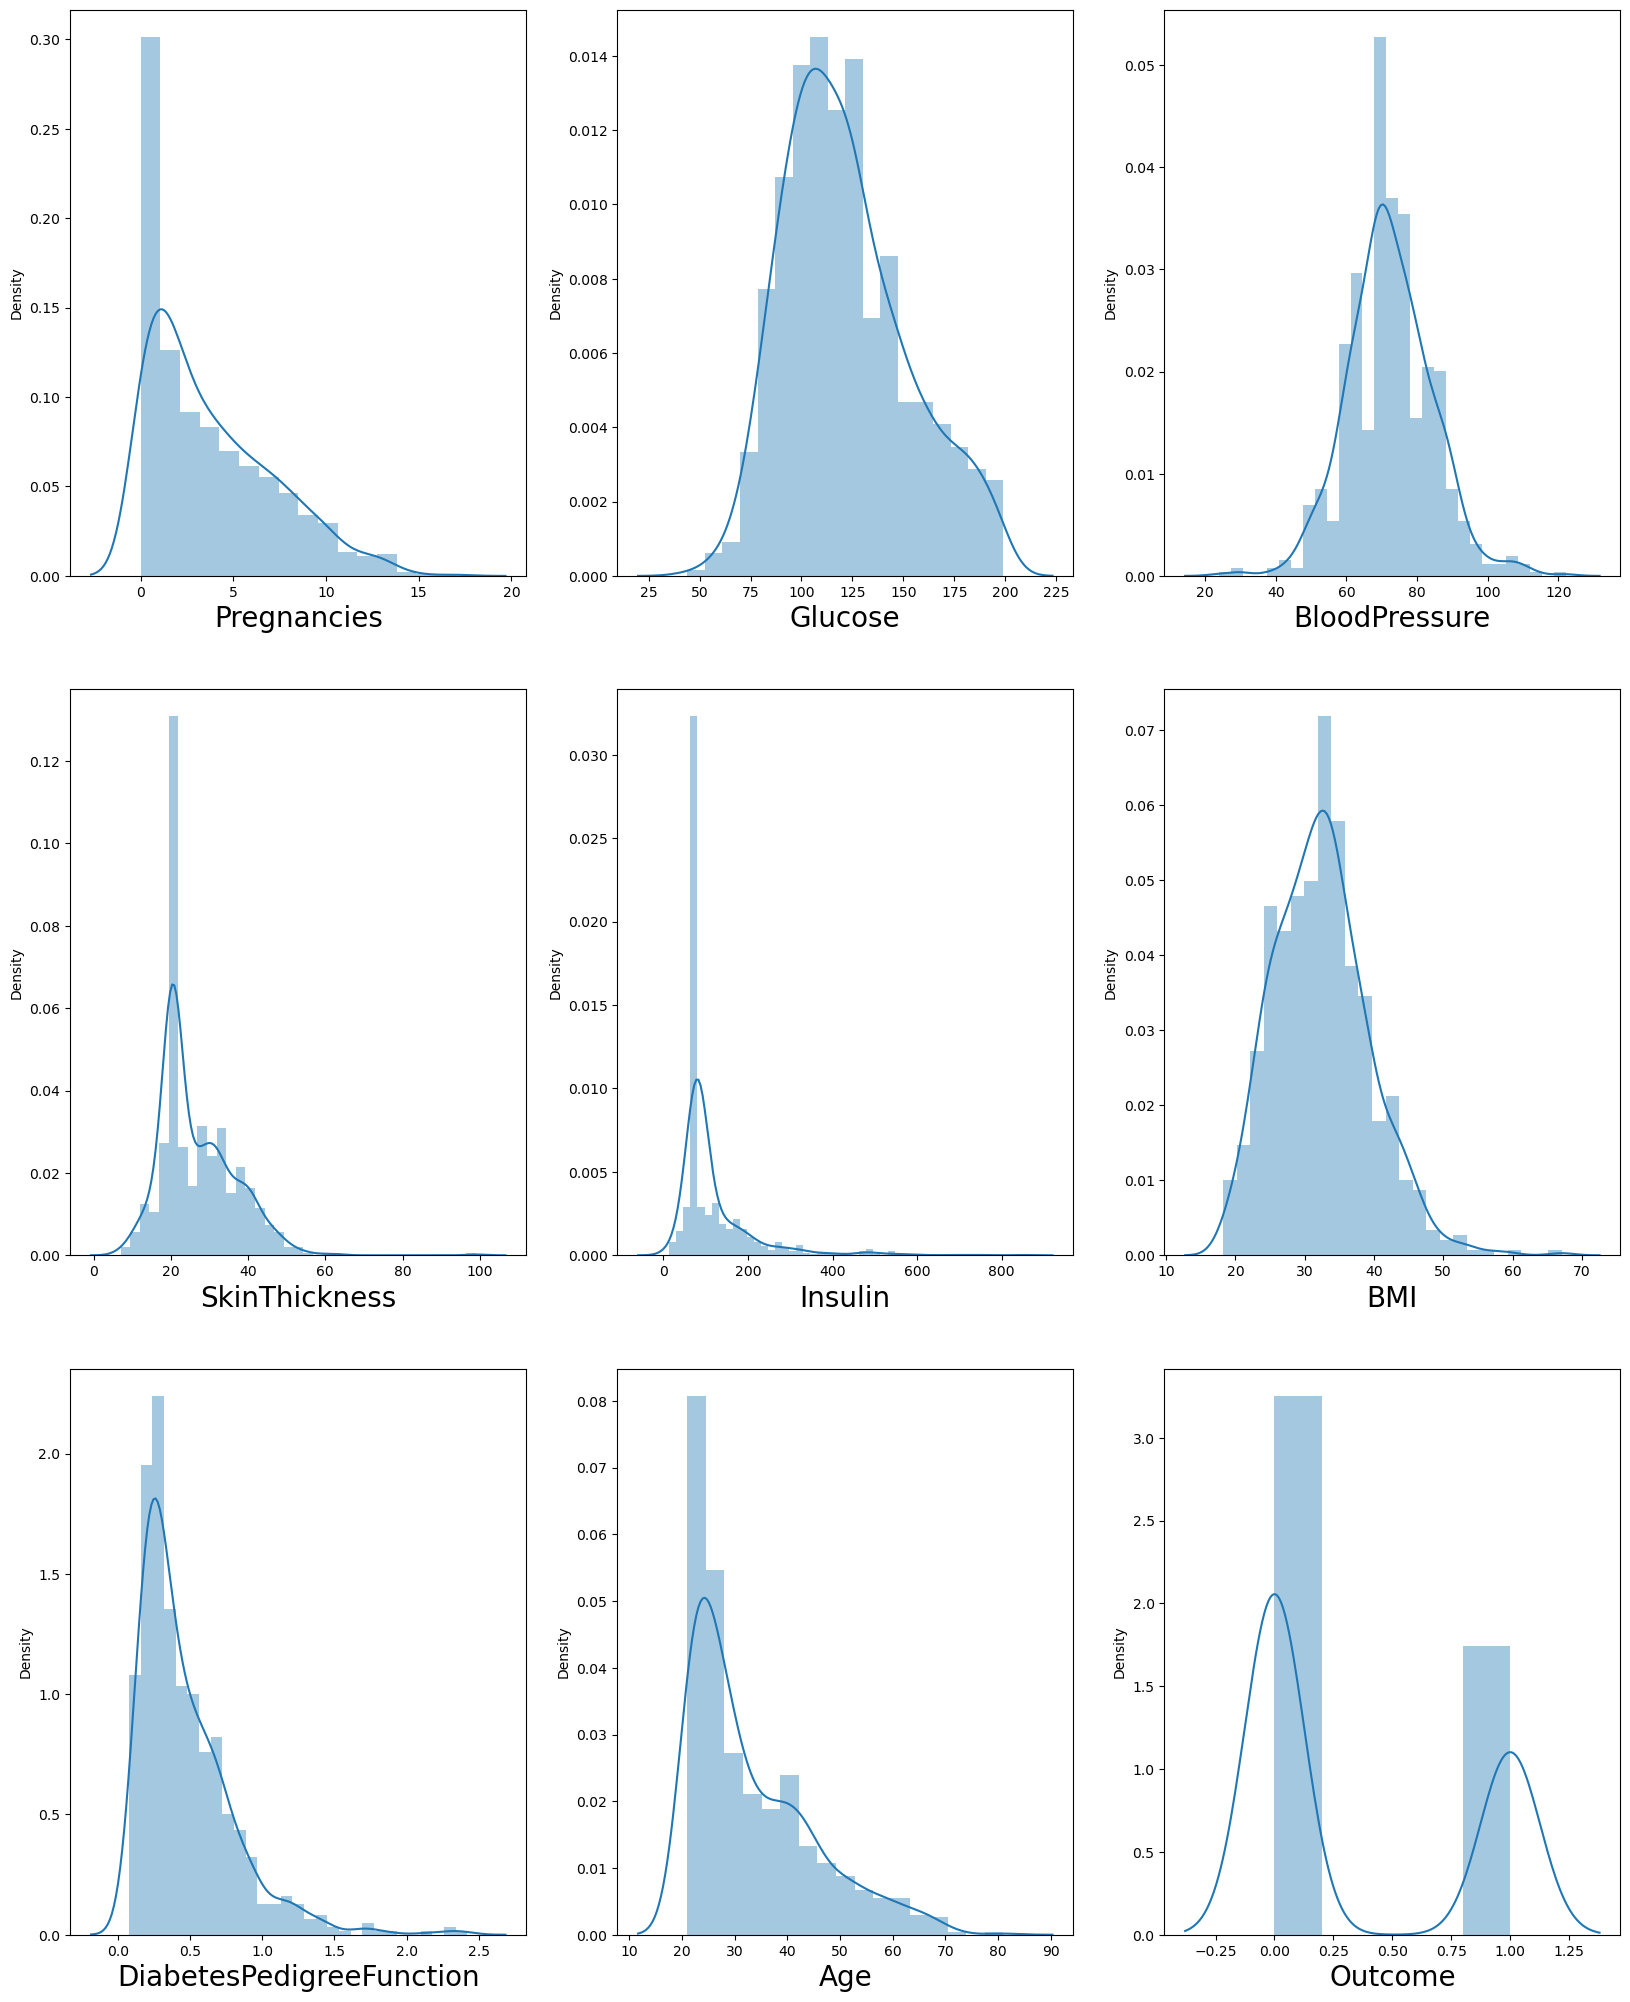

In [8]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber +=1
plt.show()

Now we have dealt with the 0 values and data looks better.But, there still are outliers present in some columns.Let's deal with them.

In [9]:
df_features = data.drop(columns = 'Outcome')

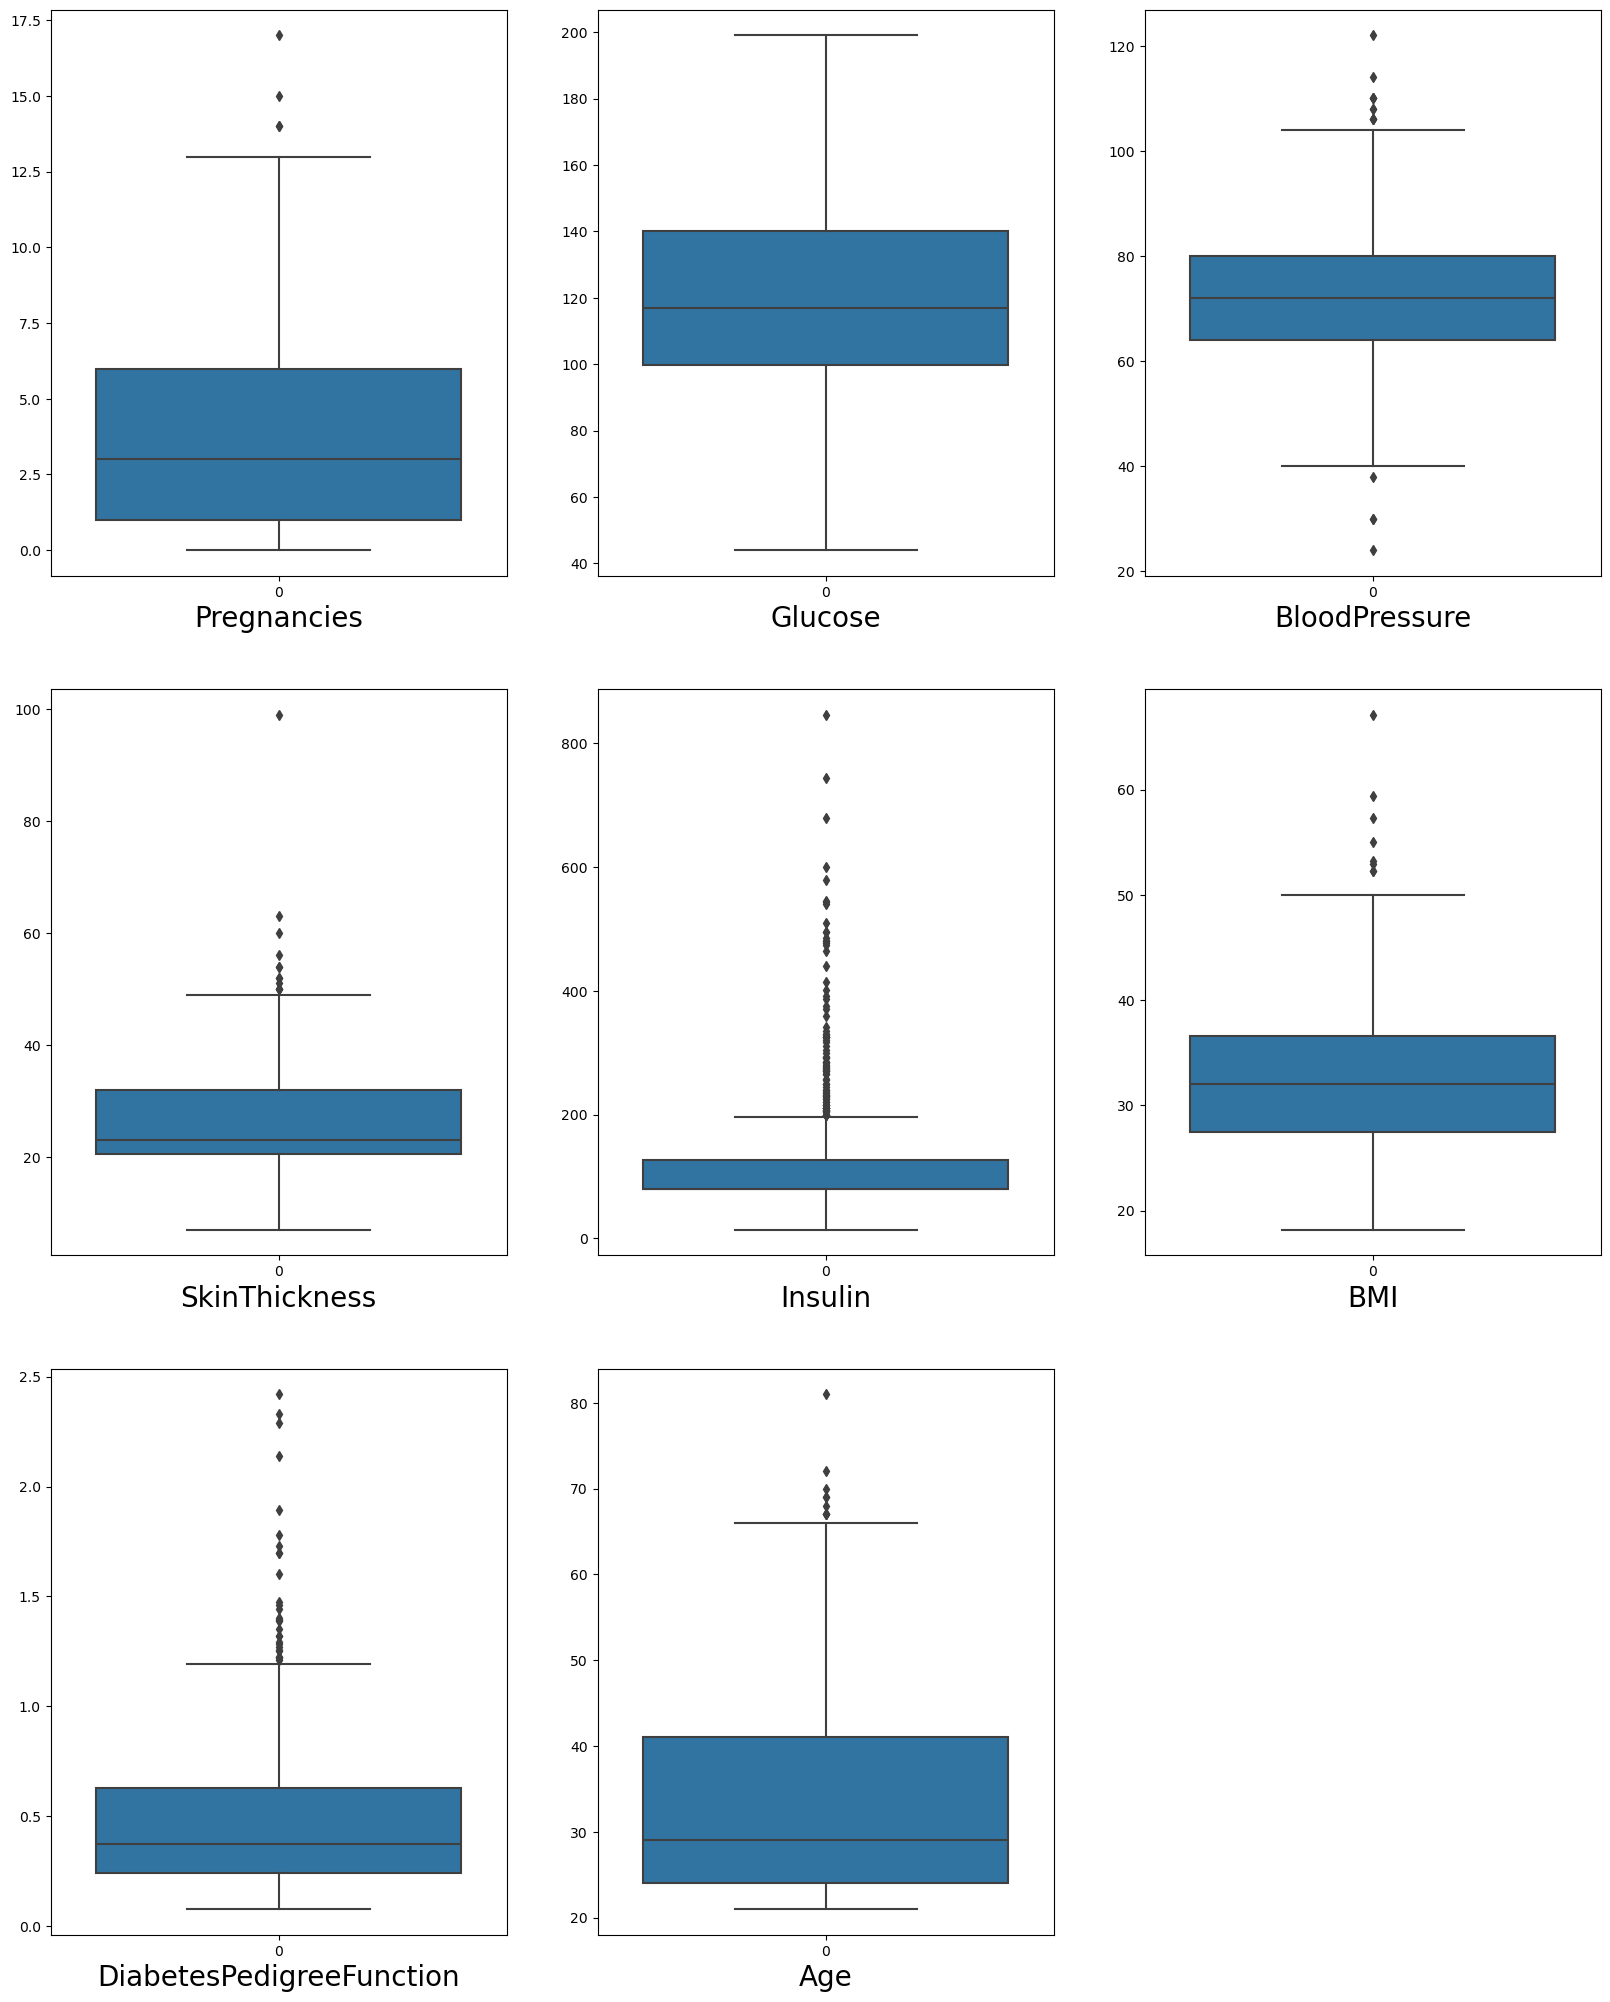

In [10]:
# Visualize the outliers using boxplot

plt.figure(figsize =(20,25))
graph = 1

for column in df_features:
    if graph <= 9:
        plt.subplot(3,3,graph)
        sns.boxplot(df_features[column])
        plt.xlabel(column, fontsize = 20)
        
    graph += 1
plt.show()       

In [11]:
data.shape

(768, 9)

In [12]:
# Find the IQR (inter quantile range) to identify outliers

# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

# IQR

iqr = q3 - q1

### Outlier detection formula

**higher side** ==> **Q3 + (1.5 * IQR)**

**lower side** ==> **Q1 - (1.5 * IQR)**

In [13]:
# Validating the outliers

preg_high = q3.Pregnancies + (1.5 * iqr.Pregnancies)
preg_high

13.5

In [14]:
# Check the indexes which have higher values

get_index = np.where(data['Pregnancies'] > preg_high)
get_index

(array([ 88, 159, 298, 455], dtype=int64),)

In [15]:
# Drop the index which we found in the above cell

data = data.drop(data.index[get_index])
data.shape

(764, 9)

In [16]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp_high = q3.BloodPressure + (1.5 * iqr.BloodPressure)
print(bp_high)

get_index = np.where(data['BloodPressure'] > bp_high)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
st_high = q3.SkinThickness + (1.5 * iqr.SkinThickness)
print(st_high)

get_index = np.where(data['SkinThickness'] > st_high)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
insu_high = q3.Insulin + (1.5 * iqr.Insulin)
print(insu_high)

get_index = np.where(data['Insulin'] > insu_high)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
BMI_high = q3.BMI + (1.5 * iqr.BMI)
print(BMI_high)

get_index = np.where(data['BMI'] > BMI_high)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
dpf_high = q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction)
print(dpf_high)

get_index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
age_high = q3.Age + (1.5 * iqr.Age)
print(age_high)

get_index = np.where(data['Age'] > age_high)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


we have deal with all the high ouliers now to deal with low outliers

In [23]:
bp_low = q1.BloodPressure - (1.5 * iqr.BloodPressure)
print(bp_low)

get_index = np.where(data['BloodPressure'] < bp_low)

data = data.drop(data.index[get_index])
print(data.shape)

data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


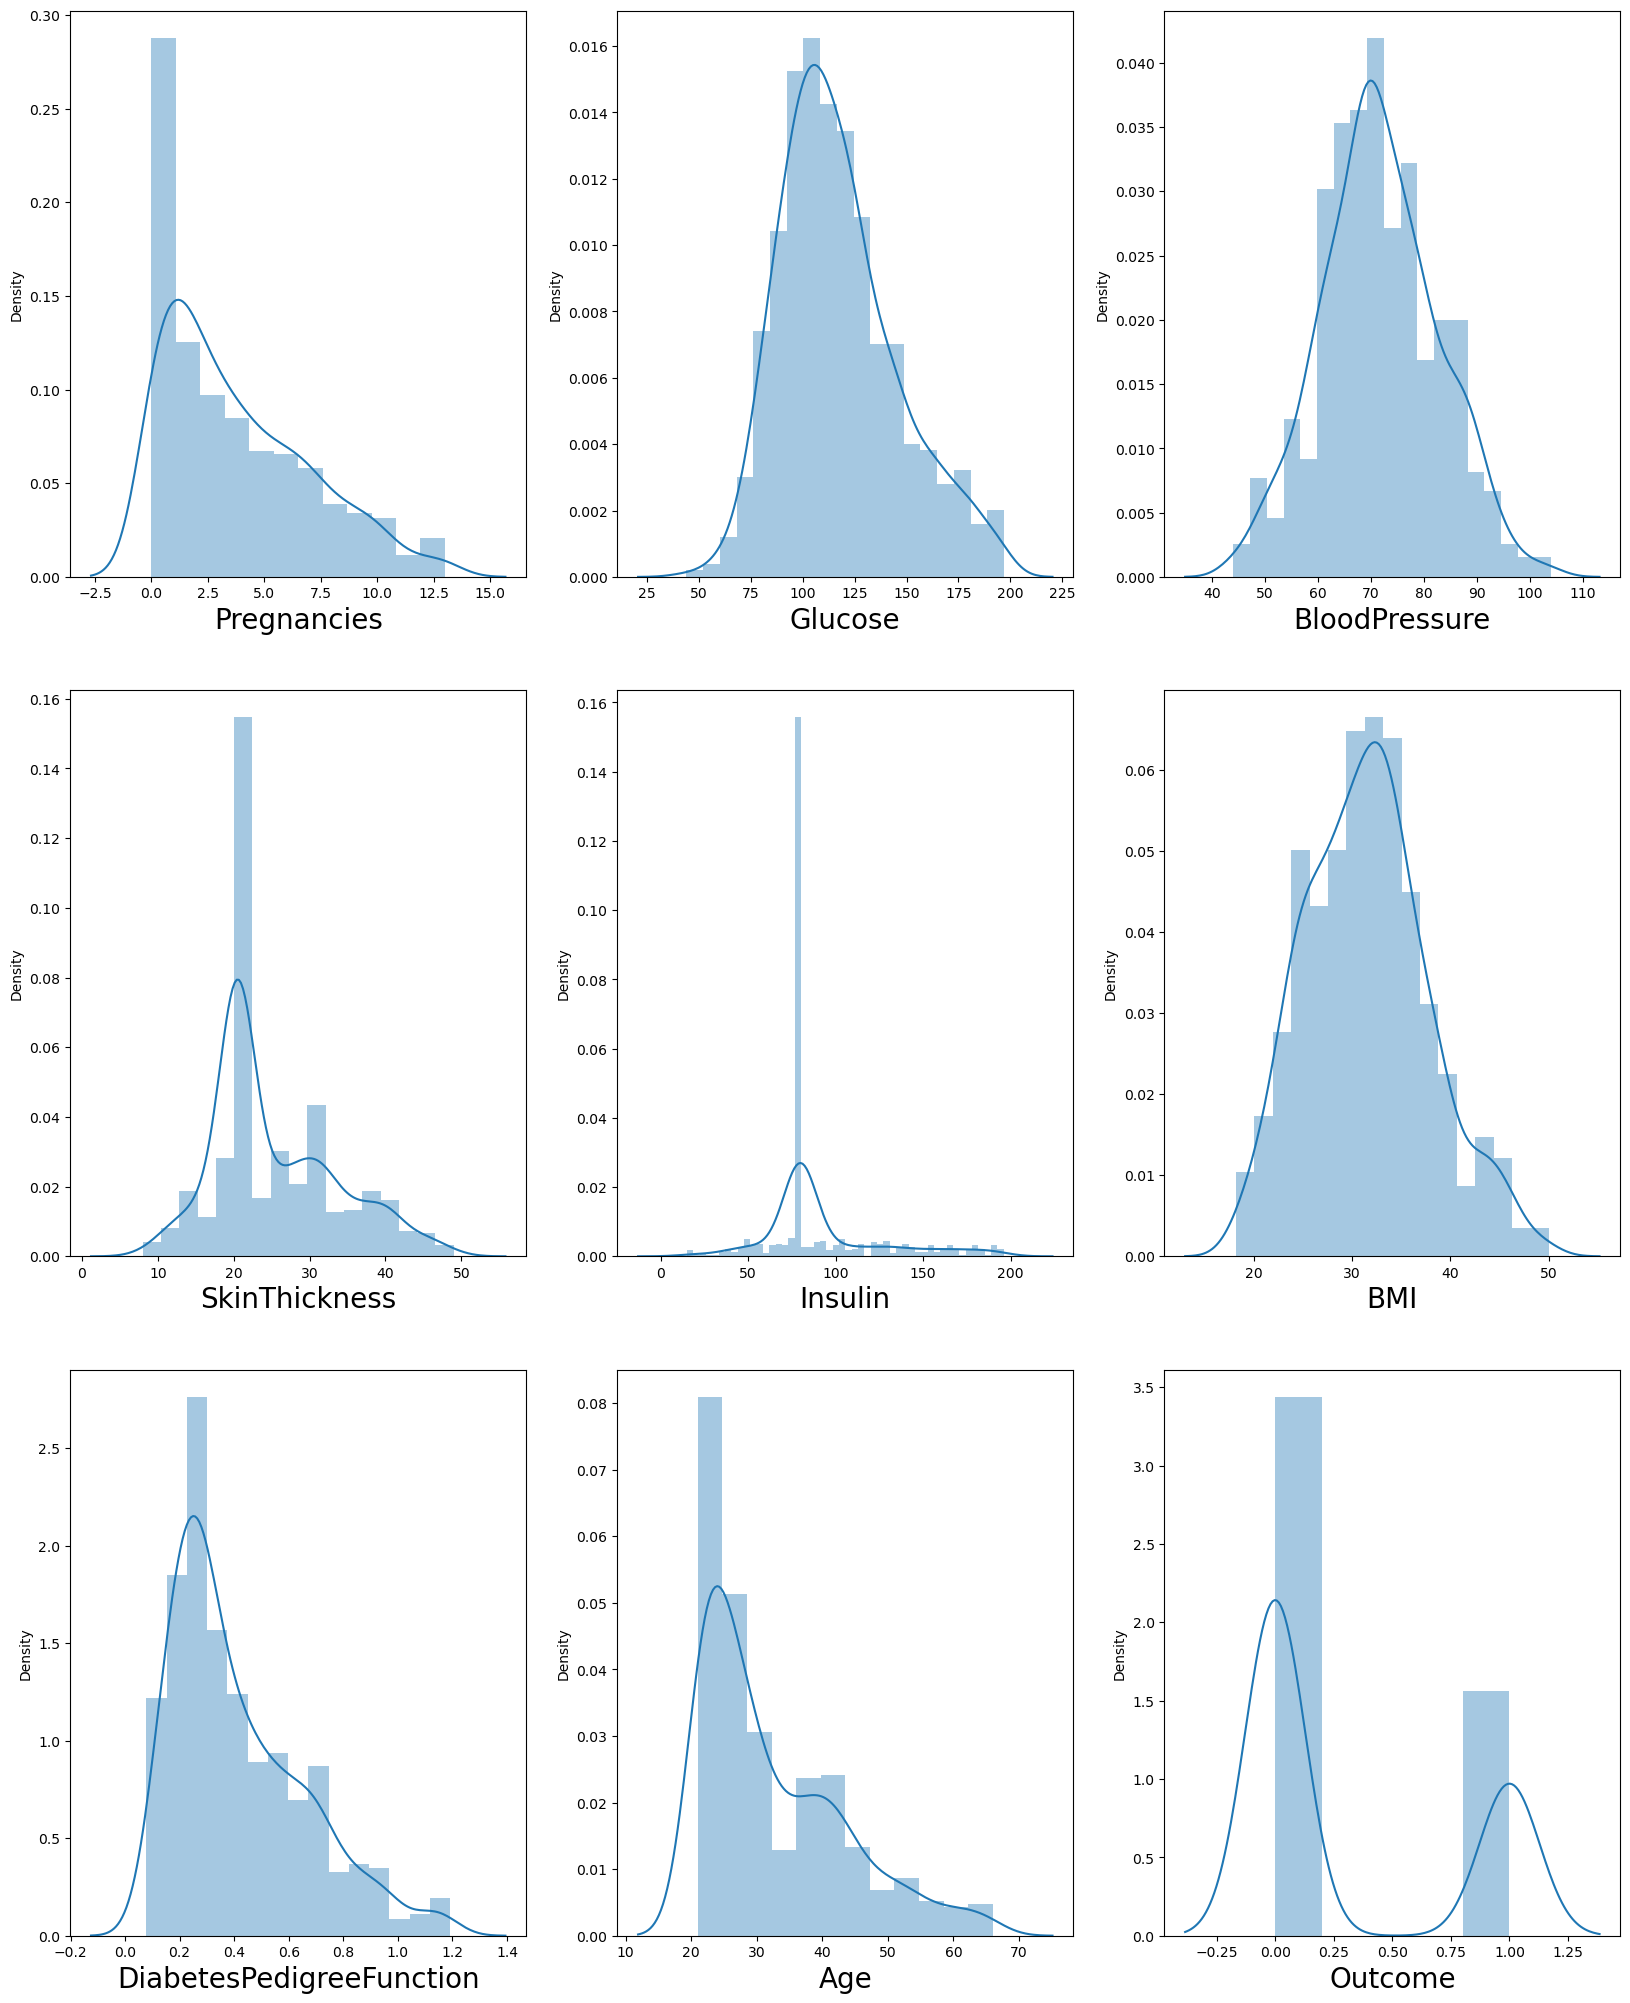

In [24]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber +=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

### Find relationship. We want to keep only those features which have relationship with Label.

In [25]:
X = data.drop(columns = 'Outcome')
y = data['Outcome']

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

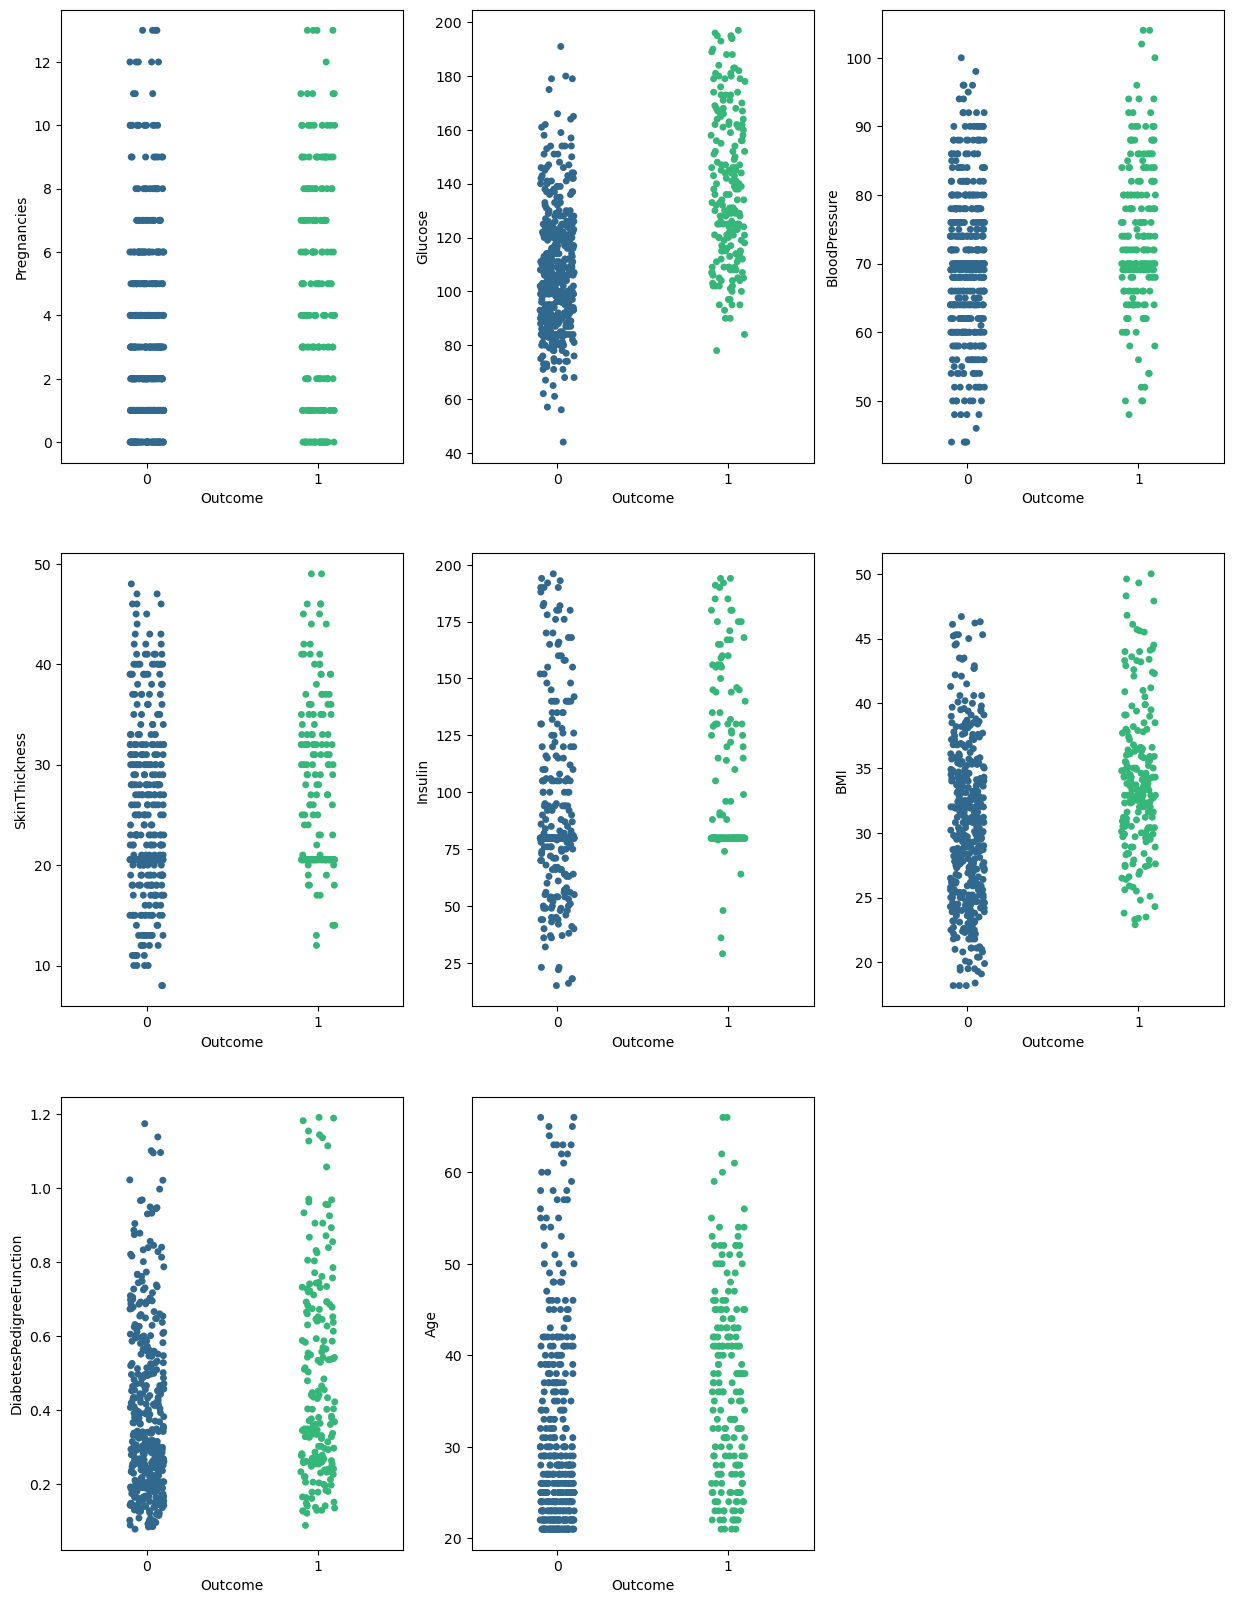

In [26]:
# Let's see how features are related to class

plt.figure(figsize = (15,20))
plotnumber = 1

for column in X:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        sns.stripplot(x = y, y = X[column], palette = 'viridis')
        
    plotnumber += 1
plt.show()

Great!!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [28]:
X_scaled.shape[1]    # shape gives (619,8) - (row,column) but shape[1] gives 1 index means column

8

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
# Finding variance inflation factor in each scaled column i.e X_scaled.shaped[1] (1/(1-R2)) 

vif = pd.DataFrame()    # defining a empty dataframe (vif)

vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

# Let's check the values

vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that let's split our data in test and training set.

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size = 0.25, random_state = 355)

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

Let's see how well our model performs on the test data set.

In [33]:
y_pred = log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Model Accuracy

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7612903225806451

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



we created this model with accuracy value of 76%
                             recall value of 69%
                          precision value of 73%